# Constructing Graph with Fixed Effects Regression

In [11]:
import pandas as pd
import numpy as np
economic_data = pd.read_excel("efw-2021-master-index-data-for-researchers.xlsx",
                              index_col = [1,0],
                              header = [0],
                              sheet_name = "EFW Panel Data 2021 Report")
economic_data.dropna(how = "all", axis = 1, inplace = True)
xlsx = pd.ExcelFile("mpd2020.xlsx")
gdp_data = pd.read_excel(xlsx, "Full data", index_col = [0,1], header = [0])
economic_data["RGDP per capita"] = economic_data.index.map(gdp_data["RGDP per capita"])
economic_data = economic_data.sort_values(["ISO", "Year"], ascending = (True, True))
economic_data = economic_data.drop(["Countries"], axis = 1).dropna(how = "any", axis = 0)

# difference RGDP per capita once
economic_data["RGDP per capita"] = economic_data["RGDP per capita"].groupby(level=0).diff()
economic_data.dropna(inplace = True)
economic_data

ISO_Code   Summary  Size of Government  \
ISO Year                                           
AGO 2006      24.0  4.790745            5.633145   
    2007      24.0  4.854972            5.520344   
    2008      24.0  4.877331            5.371626   
    2009      24.0  5.319136            7.454668   
    2010      24.0  5.386032            6.308737   
...            ...       ...                 ...   
ZWE 2014     716.0  5.898573            6.773982   
    2015     716.0  6.339343            6.967275   
    2016     716.0  5.815715            5.332185   
    2017     716.0  5.191592            4.698293   
    2018     716.0  5.310210            4.378478   

          Legal System & Property Rights  Sound Money  \
ISO Year                                                
AGO 2006                        3.237054     4.061198   
    2007                        3.223210     4.453327   
    2008                        3.381772     5.032836   
    2009                        3.393677     5.238259   
    2010                        3.573554     5.570226   
...                                  ...          ...   
ZWE 2014                        3.930055     7.966798   
    2015                        4.108502     8.180178   
    2016                        4.056637     7.378648   
    2017                        4.071713     6.719400   
    2018                        4.042090     6.044910   

          Freedom to trade internationally  Regulation  RGDP per capita  
ISO Year                                                                 
AGO 2006                          5.811252    5.211075         883.5667  
    2007                          5.632128    5.445851        1181.2110  
    2008                          5.379912    5.220508         970.1999  
    2009                          5.503781    5.005297         343.8559  
    2010                          5.756330    5.721314         433.0617  
...                                    ...         ...              ...  
ZWE 2014                          5.783920    5.038112         -10.0000  
    2015                          5.884012    6.556751         -34.0000  
    2016                          5.789575    6.521529         -26.0000  
    2017                          4.068273    6.400282          48.3662  
    2018                          5.782070    6.303501          29.0390  

[2999 rows x 8 columns]

In [2]:
countries = list(economic_data.groupby("ISO").mean().index)[:-1]
years = list(economic_data.groupby("Year").mean().index)[:-1]

for name in countries:
    economic_data[name]= 0
    economic_data[name].loc[name]=1
for year in years:
    economic_data[year]= 0    
    economic_data[year][economic_data.index.get_level_values("Year") == year] = 1
dep_vars = list(economic_data)[2:8]
economic_data[years].describe()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[name].loc[name]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[name].loc[name]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[name].loc[name]=1
C:\User

C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[name].loc[name]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[name].loc[name]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[name].loc[name]=1
C:\User

C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[name].loc[name]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[name].loc[name]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[name].loc[name]=1
C:\User

C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[name].loc[name]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  economic_data[name]= 0
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec

C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[name].loc[name]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  economic_data[name]= 0
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec

C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  economic_data[name]= 0
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[name].loc[name]=1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragme

C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[year][economic_data.index.get_level_values("Year") == year] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  economic_data[year]= 0
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  economic_data[year]= 0
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data[year][economic_data.index.get_level_values("Year") == year] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\648454759.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using

1980         1985         1990         1995         2000  \
count  2849.000000  2849.000000  2849.000000  2849.000000  2849.000000   
mean      0.019656     0.028782     0.031590     0.032994     0.035802   
std       0.138840     0.167223     0.174937     0.178652     0.185829   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              2001         2002         2003         2004         2005  ...  \
count  2849.000000  2849.000000  2849.000000  2849.000000  2849.000000  ...   
mean      0.038961     0.041418     0.041418     0.041418     0.042822  ...   
std       0.193536     0.199290     0.199290     0.199290     0.202491  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              2008         2009         2010         2011         2012  \
count  2849.000000  2849.000000  2849.000000  2849.000000  2849.000000   
mean      0.047736     0.047736     0.047736     0.047736     0.050895   
std       0.213245     0.213245     0.213245     0.213245     0.219822   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              2013         2014         2015         2016         2017  
count  2849.000000  2849.000000  2849.000000  2849.000000  2849.000000  
mean      0.050895     0.050895     0.051948     0.052650     0.052650  
std       0.219822     0.219822     0.221961     0.223373     0.223373  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 22 columns]

In [3]:
# from pgmpy.independencies import Independencies
# independencies = Independencies()

# for country in countries:
#     ind = [c for c in countries if c != country]
#     independencies.add_assertions([country, ind])
# independencies

In [4]:
# example for developing residuals using entityt fixed effects
import statsmodels.api as sm
import copy as copy
df = economic_data.copy()
residuals = {}
for y_var in dep_vars:
    X_vars = copy.copy(dep_vars) + countries# + years
    X_vars.remove(y_var)
    X = df[X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)
residuals

C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\3638508176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\3638508176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\JLCat\AppData\Local\Temp\ipykernel_10492\3638508176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Size of Government  Legal System & Property Rights  Sound Money  \
ISO Year                                                                    
AGO 2007           -1.082201                       -0.126665    -1.557059   
    2008           -1.155056                        0.066197    -0.768312   
    2009            0.935719                        0.010510    -0.657400   
    2010           -0.436449                        0.093759    -0.824232   
    2011           -0.470055                        0.156192    -0.323872   
...                      ...                             ...          ...   
ZWE 2014            0.223883                       -0.314150     3.409938   
    2015            0.084422                       -0.403720     2.618261   
    2016           -1.497152                       -0.344173     2.013659   
    2017           -1.684412                       -0.150534     2.324685   
    2018           -2.374223                       -0.229900     0.881121   

          Freedom to trade internationally  Regulation  RGDP per capita  
ISO Year                                                                 
AGO 2007                          1.271638    0.437335       313.843411  
    2008                          0.949297    0.138765      -113.811375  
    2009                          0.332844   -0.395655      -597.213790  
    2010                          0.679255    0.336821       104.642429  
    2011                          0.902855   -0.305557       153.872471  
...                                    ...         ...              ...  
ZWE 2014                          0.254260   -0.824277        95.261289  
    2015                         -0.186728    0.576278       -69.257682  
    2016                          0.530820    0.898479        -1.723081  
    2017                         -0.767441    1.151712       176.657323  
    2018                          1.267759    1.003918       -42.138310  

[2849 rows x 6 columns]

In [6]:
def gen_error_terms(df, endog, entities):
    residuals = {}
    for y_var in endog:
        X_vars = list(endog) + entities
        X_vars.remove(y_var)
        X = df[X_vars]
        X["Constant"] = 1
        y = df[[y_var]]
        residuals[y_var] = sm.OLS(y, X).fit().resid    
    return pd.DataFrame(residuals)



def map_residuals(df, dep_vars, entities):
    def check_remaining_controls(control_vars, residuals, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
#             if y in residuals[x]:
            c_used.append(c_var)
            print(x,y, controls_used)
            residuals[tuple(i for i in c_used)] = gen_error_terms(df, dep_vars, entities)
            remaining_controls = copy.copy(control_vars)
            remaining_controls.remove(c_var)

            # recursive function that iterates through remaining variables 
            #  uses them as controls statistical significance holds without them,
            #  otherwise break
            check_remaining_controls(remaining_controls, residuals, x, y, c_used)
    residuals = {}
    
    for x in dep_vars:
#         ys = undirected_graph[x]
        for y in dep_vars:
            if x != y:
                residuals[x,y] = {}
                residuals[x,y][None] = gen_error_terms(df, dep_vars, entities)
                control_vars = [z for z in dep_vars if z != y and z != x]
                check_remaining_controls(control_vars, residuals[x,y], x, y, [])        

    return residuals

# build fully connected graph to pass to build_skeleton()


residuals = map_residuals(economic_data[dep_vars + countries],#years], 
                          dep_vars, 
                          countries)
residuals

Size of Government Legal System & Property Rights []
Size of Government Legal System & Property Rights ['Sound Money']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'RGDP per capita']
Size of Government Legal System & Property Rights ['Sound Money']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation', 'RGDP per capita']

Size of Government Sound Money ['Freedom to trade internationally', 'Regulation', 'RGDP per capita']
Size of Government Sound Money ['Freedom to trade internationally']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita', 'Legal System & Property Rights']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita']
Size of Government Sound Money ['Freedom to trade internationally', 'RGDP per capita', 'Regulation']
Size of Government Sound Money []
Size of Government Sound Money ['Regulation']
Size of Government Sound Money ['Regulation', 'Legal System & Property Rights']
Size of Government Sound Money ['Regulation', 'Legal System & Property Rights', 'Freedom to trade internationally']
Size of Government Sound Money ['Regulation', 'Legal System & Property Rights']
Size of Government Sound Money ['Regulation', 'Legal System & Property Rights',

Size of Government Freedom to trade internationally ['RGDP per capita']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Sound Money']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Sound Money', 'Legal System & Property Rights']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Sound Money']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Sound Money', 'Regulation']
Size of Government Freedom to trade internationally ['RGDP per capita']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Regulation']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Regulation', 'Legal System & Property Rights']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Regulation']
Size of Government Freedom to trade internationally ['RGDP per capita', 'Regulation', 'Sound Money']
Size of Government Regulation []
Size of Government Regulation ['Le

Size of Government RGDP per capita ['Sound Money']
Size of Government RGDP per capita ['Sound Money', 'Freedom to trade internationally']
Size of Government RGDP per capita ['Sound Money', 'Freedom to trade internationally', 'Legal System & Property Rights']
Size of Government RGDP per capita ['Sound Money', 'Freedom to trade internationally']
Size of Government RGDP per capita ['Sound Money', 'Freedom to trade internationally', 'Regulation']
Size of Government RGDP per capita ['Sound Money']
Size of Government RGDP per capita ['Sound Money', 'Regulation']
Size of Government RGDP per capita ['Sound Money', 'Regulation', 'Legal System & Property Rights']
Size of Government RGDP per capita ['Sound Money', 'Regulation']
Size of Government RGDP per capita ['Sound Money', 'Regulation', 'Freedom to trade internationally']
Size of Government RGDP per capita []
Size of Government RGDP per capita ['Freedom to trade internationally']
Size of Government RGDP per capita ['Freedom to trade internat

Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money', 'Freedom to trade internationally']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money', 'Regulation']
Legal System & Property Rights Size of Government ['RGDP per capita']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Freedom to trade internationally']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Freedom to trade internationally', 'Sound Money']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Freedom to trade internationally']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Freedom to trade internationally', 'Regulation']
Legal System & Property Rights Size of Government ['RGDP per capita']
Legal System & Pr

Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'Regulation', 'RGDP per capita']
Legal System & Property Rights Freedom to trade internationally ['Size of Government']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'RGDP per capita']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'RGDP per capita', 'Sound Money']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'RGDP per capita']
Legal System & Property Rights Freedom to trade internationally ['Size of Government', 'RGDP per capita', 'Regulation']
Legal System & Property Rights Freedom to trade internationally []
Legal System & Property Rights Freedom to trade internationally ['Sound Money']
Legal System & Property Rights Freedom to trade internationally ['Sound Money', 'Size of Government']
Legal System & Property Rights Freedom to trade internationally ['Sound Money', 'Size of Go

Legal System & Property Rights Regulation []
Legal System & Property Rights Regulation ['Freedom to trade internationally']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government', 'Sound Money']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Size of Government', 'RGDP per capita']
Legal System & Property Rights Regulation ['Freedom to trade internationally']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Sound Money']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Sound Money', 'Size of Government']
Legal System & Property Rights Regulation ['Freedom to trade internationally', 'Sound Money']
Legal System & Property Rights Regulation ['Freedom to 

Legal System & Property Rights RGDP per capita ['Regulation', 'Sound Money', 'Freedom to trade internationally']
Legal System & Property Rights RGDP per capita ['Regulation']
Legal System & Property Rights RGDP per capita ['Regulation', 'Freedom to trade internationally']
Legal System & Property Rights RGDP per capita ['Regulation', 'Freedom to trade internationally', 'Size of Government']
Legal System & Property Rights RGDP per capita ['Regulation', 'Freedom to trade internationally']
Legal System & Property Rights RGDP per capita ['Regulation', 'Freedom to trade internationally', 'Sound Money']
Sound Money Size of Government []
Sound Money Size of Government ['Legal System & Property Rights']
Sound Money Size of Government ['Legal System & Property Rights', 'Freedom to trade internationally']
Sound Money Size of Government ['Legal System & Property Rights', 'Freedom to trade internationally', 'Regulation']
Sound Money Size of Government ['Legal System & Property Rights', 'Freedom to 

Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation', 'Size of Government']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Freedom to trade internationally']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita', 'Size of Government']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita', 'Regulation']
Sound Money Legal System & Property Rights []
Sound Money Legal System & Property Rights ['Regulation']
Sound Money Legal System & Property Rights ['Regulation', 'Si

Sound Money Freedom to trade internationally ['RGDP per capita', 'Size of Government']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Size of Government', 'Legal System & Property Rights']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Size of Government']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Size of Government', 'Regulation']
Sound Money Freedom to trade internationally ['RGDP per capita']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Legal System & Property Rights']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Legal System & Property Rights', 'Size of Government']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Legal System & Property Rights']
Sound Money Freedom to trade internationally ['RGDP per capita', 'Legal System & Property Rights', 'Regulation']
Sound Money Freedom to trade internationally ['RGDP per capita']
Sound Money Freedom to trade international

Sound Money RGDP per capita ['Legal System & Property Rights']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally', 'Size of Government']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally', 'Regulation']
Sound Money RGDP per capita ['Legal System & Property Rights']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Regulation']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Regulation', 'Size of Government']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Regulation']
Sound Money RGDP per capita ['Legal System & Property Rights', 'Regulation', 'Freedom to trade internationally']
Sound Money RGDP per capita []
Sound Money RGDP per capita ['Freedom to trad

Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights', 'Sound Money']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Legal System & Property Rights', 'Regulation']
Freedom to trade internationally Size of Government ['RGDP per capita']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Sound Money']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Sound Money', 'Legal System & Property Rights']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Sound Money']
Freedom to trade internationally Size of Government ['RGDP per capita', 'Sound Money', 'Regulation']
Freedom to trade internationally Size of Government ['RGDP per capita']
Freedom

Freedom to trade internationally Sound Money ['Size of Government', 'Legal System & Property Rights']
Freedom to trade internationally Sound Money ['Size of Government', 'Legal System & Property Rights', 'RGDP per capita']
Freedom to trade internationally Sound Money ['Size of Government']
Freedom to trade internationally Sound Money ['Size of Government', 'Regulation']
Freedom to trade internationally Sound Money ['Size of Government', 'Regulation', 'Legal System & Property Rights']
Freedom to trade internationally Sound Money ['Size of Government', 'Regulation']
Freedom to trade internationally Sound Money ['Size of Government', 'Regulation', 'RGDP per capita']
Freedom to trade internationally Sound Money ['Size of Government']
Freedom to trade internationally Sound Money ['Size of Government', 'RGDP per capita']
Freedom to trade internationally Sound Money ['Size of Government', 'RGDP per capita', 'Legal System & Property Rights']
Freedom to trade internationally Sound Money ['Size 

Freedom to trade internationally Regulation ['Legal System & Property Rights', 'RGDP per capita']
Freedom to trade internationally Regulation ['Legal System & Property Rights', 'RGDP per capita', 'Sound Money']
Freedom to trade internationally Regulation []
Freedom to trade internationally Regulation ['Sound Money']
Freedom to trade internationally Regulation ['Sound Money', 'Size of Government']
Freedom to trade internationally Regulation ['Sound Money', 'Size of Government', 'Legal System & Property Rights']
Freedom to trade internationally Regulation ['Sound Money', 'Size of Government']
Freedom to trade internationally Regulation ['Sound Money', 'Size of Government', 'RGDP per capita']
Freedom to trade internationally Regulation ['Sound Money']
Freedom to trade internationally Regulation ['Sound Money', 'Legal System & Property Rights']
Freedom to trade internationally Regulation ['Sound Money', 'Legal System & Property Rights', 'Size of Government']
Freedom to trade internationall

Freedom to trade internationally RGDP per capita ['Regulation', 'Legal System & Property Rights', 'Size of Government']
Freedom to trade internationally RGDP per capita ['Regulation', 'Legal System & Property Rights']
Freedom to trade internationally RGDP per capita ['Regulation', 'Legal System & Property Rights', 'Sound Money']
Freedom to trade internationally RGDP per capita ['Regulation']
Freedom to trade internationally RGDP per capita ['Regulation', 'Sound Money']
Freedom to trade internationally RGDP per capita ['Regulation', 'Sound Money', 'Size of Government']
Freedom to trade internationally RGDP per capita ['Regulation', 'Sound Money']
Freedom to trade internationally RGDP per capita ['Regulation', 'Sound Money', 'Legal System & Property Rights']
Regulation Size of Government []
Regulation Size of Government ['Legal System & Property Rights']
Regulation Size of Government ['Legal System & Property Rights', 'Sound Money']
Regulation Size of Government ['Legal System & Property

Regulation Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'Size of Government']
Regulation Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Regulation Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'RGDP per capita']
Regulation Legal System & Property Rights ['Sound Money']
Regulation Legal System & Property Rights ['Sound Money', 'RGDP per capita']
Regulation Legal System & Property Rights ['Sound Money', 'RGDP per capita', 'Size of Government']
Regulation Legal System & Property Rights ['Sound Money', 'RGDP per capita']
Regulation Legal System & Property Rights ['Sound Money', 'RGDP per capita', 'Freedom to trade internationally']
Regulation Legal System & Property Rights []
Regulation Legal System & Property Rights ['Freedom to trade internationally']
Regulation Legal System & Property Rights ['Freedom to trade internationally', 'Size of Government']
Regulation Legal System & Pr

Regulation Sound Money ['RGDP per capita', 'Legal System & Property Rights', 'Size of Government']
Regulation Sound Money ['RGDP per capita', 'Legal System & Property Rights']
Regulation Sound Money ['RGDP per capita', 'Legal System & Property Rights', 'Freedom to trade internationally']
Regulation Sound Money ['RGDP per capita']
Regulation Sound Money ['RGDP per capita', 'Freedom to trade internationally']
Regulation Sound Money ['RGDP per capita', 'Freedom to trade internationally', 'Size of Government']
Regulation Sound Money ['RGDP per capita', 'Freedom to trade internationally']
Regulation Sound Money ['RGDP per capita', 'Freedom to trade internationally', 'Legal System & Property Rights']
Regulation Freedom to trade internationally []
Regulation Freedom to trade internationally ['Size of Government']
Regulation Freedom to trade internationally ['Size of Government', 'Legal System & Property Rights']
Regulation Freedom to trade internationally ['Size of Government', 'Legal System 

Regulation RGDP per capita ['Legal System & Property Rights']
Regulation RGDP per capita ['Legal System & Property Rights', 'Sound Money']
Regulation RGDP per capita ['Legal System & Property Rights', 'Sound Money', 'Size of Government']
Regulation RGDP per capita ['Legal System & Property Rights', 'Sound Money']
Regulation RGDP per capita ['Legal System & Property Rights', 'Sound Money', 'Freedom to trade internationally']
Regulation RGDP per capita ['Legal System & Property Rights']
Regulation RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally']
Regulation RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally', 'Size of Government']
Regulation RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally']
Regulation RGDP per capita ['Legal System & Property Rights', 'Freedom to trade internationally', 'Sound Money']
Regulation RGDP per capita []
Regulation RGDP per capita ['Sound Money']
Regulati

RGDP per capita Size of Government ['Regulation']
RGDP per capita Size of Government ['Regulation', 'Sound Money']
RGDP per capita Size of Government ['Regulation', 'Sound Money', 'Legal System & Property Rights']
RGDP per capita Size of Government ['Regulation', 'Sound Money']
RGDP per capita Size of Government ['Regulation', 'Sound Money', 'Freedom to trade internationally']
RGDP per capita Size of Government ['Regulation']
RGDP per capita Size of Government ['Regulation', 'Freedom to trade internationally']
RGDP per capita Size of Government ['Regulation', 'Freedom to trade internationally', 'Legal System & Property Rights']
RGDP per capita Size of Government ['Regulation', 'Freedom to trade internationally']
RGDP per capita Size of Government ['Regulation', 'Freedom to trade internationally', 'Sound Money']
RGDP per capita Legal System & Property Rights []
RGDP per capita Legal System & Property Rights ['Size of Government']
RGDP per capita Legal System & Property Rights ['Size of 

RGDP per capita Sound Money ['Legal System & Property Rights', 'Size of Government']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Size of Government', 'Regulation']
RGDP per capita Sound Money ['Legal System & Property Rights']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Freedom to trade internationally']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Freedom to trade internationally', 'Size of Government']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Freedom to trade internationally']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Freedom to trade internationally', 'Regulation']
RGDP per capita Sound Money ['Legal System & Property Rights']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Regulation']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Regulation', 'Size of Government']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Regulation']
RGDP 

RGDP per capita Freedom to trade internationally []
RGDP per capita Freedom to trade internationally ['Regulation']
RGDP per capita Freedom to trade internationally ['Regulation', 'Size of Government']
RGDP per capita Freedom to trade internationally ['Regulation', 'Size of Government', 'Legal System & Property Rights']
RGDP per capita Freedom to trade internationally ['Regulation', 'Size of Government']
RGDP per capita Freedom to trade internationally ['Regulation', 'Size of Government', 'Sound Money']
RGDP per capita Freedom to trade internationally ['Regulation']
RGDP per capita Freedom to trade internationally ['Regulation', 'Legal System & Property Rights']
RGDP per capita Freedom to trade internationally ['Regulation', 'Legal System & Property Rights', 'Size of Government']
RGDP per capita Freedom to trade internationally ['Regulation', 'Legal System & Property Rights']
RGDP per capita Freedom to trade internationally ['Regulation', 'Legal System & Property Rights', 'Sound Money'

{('Size of Government',
  'Legal System & Property Rights'): {None:           Size of Government  Legal System & Property Rights  Sound Money  \
  ISO Year                                                                    
  AGO 2007           -1.082201                       -0.126665    -1.557059   
      2008           -1.155056                        0.066197    -0.768312   
      2009            0.935719                        0.010510    -0.657400   
      2010           -0.436449                        0.093759    -0.824232   
      2011           -0.470055                        0.156192    -0.323872   
  ...                      ...                             ...          ...   
  ZWE 2014            0.223883                       -0.314150     3.409938   
      2015            0.084422                       -0.403720     2.618261   
      2016           -1.497152                       -0.344173     2.013659   
      2017           -1.684412                       -0.150534   

In [9]:
import pingouin
def build_skeleton_from_residuals(residuals, undirected_graph, dep_vars, p_val):
    def check_remaining_controls(control_vars, residuals, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x,y, controls_used)
                test = residuals[tuple(i for i in c_used)].partial_corr(x = x, y = y, covar=None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)

                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, residuals, undirected_graph, x, y, c_used)

    for x in dep_vars:
        ys = undirected_graph[x]
        for y in dep_vars:
            if x != y:
                test = residuals[x,y][None].partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in dep_vars if z != y and z != x]
                    check_remaining_controls(control_vars, residuals[x,y], undirected_graph, x, y, [])
    return undirected_graph
p_val = .3
undirected_graph = {key:[] for key in dep_vars}
for x in undirected_graph:
    undirected_graph[x] = [y for y in dep_vars if y != x]
undirected_graph = build_skeleton_from_residuals(residuals, undirected_graph, dep_vars, p_val = p_val)     
undirected_graph
# residuals[("Size of Government", "Sound Money")].keys()

Size of Government Legal System & Property Rights []
Size of Government Legal System & Property Rights ['Sound Money']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Freedom to trade internationally', 'RGDP per capita']
Size of Government Legal System & Property Rights ['Sound Money']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation', 'Freedom to trade internationally']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation']
Size of Government Legal System & Property Rights ['Sound Money', 'Regulation', 'RGDP per capita']

Size of Government Freedom to trade internationally ['Sound Money', 'Legal System & Property Rights', 'Regulation']
Size of Government Freedom to trade internationally ['Sound Money', 'Legal System & Property Rights']
Size of Government Freedom to trade internationally ['Sound Money', 'Legal System & Property Rights', 'RGDP per capita']
Size of Government Freedom to trade internationally ['Sound Money']
Size of Government Freedom to trade internationally ['Sound Money', 'Regulation']
Size of Government Freedom to trade internationally ['Sound Money', 'Regulation', 'Legal System & Property Rights']
Size of Government Freedom to trade internationally ['Sound Money', 'Regulation']
Size of Government Freedom to trade internationally ['Sound Money', 'Regulation', 'RGDP per capita']
Size of Government Freedom to trade internationally ['Sound Money']
Size of Government Freedom to trade internationally ['Sound Money', 'RGDP per capita']
Size of Government Freedom to trade internationally ['Sou

Legal System & Property Rights Size of Government ['Regulation', 'Freedom to trade internationally', 'RGDP per capita']
Legal System & Property Rights Size of Government ['Regulation']
Legal System & Property Rights Size of Government ['Regulation', 'RGDP per capita']
Legal System & Property Rights Size of Government ['Regulation', 'RGDP per capita', 'Sound Money']
Legal System & Property Rights Size of Government ['Regulation', 'RGDP per capita']
Legal System & Property Rights Size of Government ['Regulation', 'RGDP per capita', 'Freedom to trade internationally']
Legal System & Property Rights Size of Government []
Legal System & Property Rights Size of Government ['RGDP per capita']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money', 'Freedom to trade internationally']
Legal System & Property Rights Size of Government ['RGDP per capita', 'Sound Money']
Legal System &

Legal System & Property Rights Regulation ['Size of Government']
Legal System & Property Rights Regulation ['Size of Government', 'Sound Money']
Legal System & Property Rights Regulation ['Size of Government', 'Sound Money', 'Freedom to trade internationally']
Legal System & Property Rights Regulation ['Size of Government', 'Sound Money']
Legal System & Property Rights Regulation ['Size of Government', 'Sound Money', 'RGDP per capita']
Legal System & Property Rights Regulation ['Size of Government']
Legal System & Property Rights Regulation ['Size of Government', 'Freedom to trade internationally']
Legal System & Property Rights Regulation ['Size of Government', 'Freedom to trade internationally', 'Sound Money']
Legal System & Property Rights Regulation ['Size of Government', 'Freedom to trade internationally']
Legal System & Property Rights Regulation ['Size of Government', 'Freedom to trade internationally', 'RGDP per capita']
Legal System & Property Rights Regulation ['Size of Gover

Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation', 'Size of Government']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'Regulation', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Freedom to trade internationally']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita', 'Size of Government']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita']
Sound Money Legal System & Property Rights ['Freedom to trade internationally', 'RGDP per capita', 'Regulation']
Sound Money Legal System & Property Rights []
Sound Money Legal System 

Sound Money Regulation ['Freedom to trade internationally', 'RGDP per capita', 'Legal System & Property Rights']
Sound Money Regulation []
Sound Money Regulation ['RGDP per capita']
Sound Money Regulation ['RGDP per capita', 'Size of Government']
Sound Money Regulation ['RGDP per capita', 'Size of Government', 'Legal System & Property Rights']
Sound Money Regulation ['RGDP per capita', 'Size of Government']
Sound Money Regulation ['RGDP per capita', 'Size of Government', 'Freedom to trade internationally']
Sound Money Regulation ['RGDP per capita']
Sound Money Regulation ['RGDP per capita', 'Legal System & Property Rights']
Sound Money Regulation ['RGDP per capita', 'Legal System & Property Rights', 'Size of Government']
Sound Money Regulation ['RGDP per capita', 'Legal System & Property Rights']
Sound Money Regulation ['RGDP per capita', 'Legal System & Property Rights', 'Freedom to trade internationally']
Sound Money Regulation ['RGDP per capita']
Sound Money Regulation ['RGDP per ca

Freedom to trade internationally Legal System & Property Rights ['Size of Government', 'Regulation', 'Sound Money']
Freedom to trade internationally Legal System & Property Rights ['Size of Government', 'Regulation']
Freedom to trade internationally Legal System & Property Rights ['Size of Government', 'Regulation', 'RGDP per capita']
Freedom to trade internationally Legal System & Property Rights ['Size of Government']
Freedom to trade internationally Legal System & Property Rights ['Size of Government', 'RGDP per capita']
Freedom to trade internationally Legal System & Property Rights ['Size of Government', 'RGDP per capita', 'Sound Money']
Freedom to trade internationally Legal System & Property Rights ['Size of Government', 'RGDP per capita']
Freedom to trade internationally Legal System & Property Rights ['Size of Government', 'RGDP per capita', 'Regulation']
Freedom to trade internationally Legal System & Property Rights []
Freedom to trade internationally Legal System & Property

Freedom to trade internationally Regulation ['Legal System & Property Rights', 'Size of Government', 'RGDP per capita']
Freedom to trade internationally Regulation ['Legal System & Property Rights']
Freedom to trade internationally Regulation ['Legal System & Property Rights', 'Sound Money']
Freedom to trade internationally Regulation ['Legal System & Property Rights', 'Sound Money', 'Size of Government']
Freedom to trade internationally Regulation ['Legal System & Property Rights', 'Sound Money']
Freedom to trade internationally Regulation ['Legal System & Property Rights', 'Sound Money', 'RGDP per capita']
Freedom to trade internationally Regulation ['Legal System & Property Rights']
Freedom to trade internationally Regulation ['Legal System & Property Rights', 'RGDP per capita']
Freedom to trade internationally Regulation ['Legal System & Property Rights', 'RGDP per capita', 'Size of Government']
Freedom to trade internationally Regulation ['Legal System & Property Rights', 'RGDP pe

Regulation Size of Government ['Freedom to trade internationally', 'RGDP per capita']
Regulation Size of Government ['Freedom to trade internationally', 'RGDP per capita', 'Legal System & Property Rights']
Regulation Size of Government ['Freedom to trade internationally', 'RGDP per capita']
Regulation Size of Government ['Freedom to trade internationally', 'RGDP per capita', 'Sound Money']
Regulation Size of Government []
Regulation Size of Government ['RGDP per capita']
Regulation Size of Government ['RGDP per capita', 'Legal System & Property Rights']
Regulation Size of Government ['RGDP per capita', 'Legal System & Property Rights', 'Sound Money']
Regulation Size of Government ['RGDP per capita', 'Legal System & Property Rights']
Regulation Size of Government ['RGDP per capita', 'Legal System & Property Rights', 'Freedom to trade internationally']
Regulation Size of Government ['RGDP per capita']
Regulation Size of Government ['RGDP per capita', 'Sound Money']
Regulation Size of Gov

Regulation Freedom to trade internationally ['Size of Government', 'Legal System & Property Rights', 'RGDP per capita']
Regulation Freedom to trade internationally ['Size of Government']
Regulation Freedom to trade internationally ['Size of Government', 'Sound Money']
Regulation Freedom to trade internationally ['Size of Government', 'Sound Money', 'Legal System & Property Rights']
Regulation Freedom to trade internationally ['Size of Government', 'Sound Money']
Regulation Freedom to trade internationally ['Size of Government', 'Sound Money', 'RGDP per capita']
Regulation Freedom to trade internationally ['Size of Government']
Regulation Freedom to trade internationally ['Size of Government', 'RGDP per capita']
Regulation Freedom to trade internationally ['Size of Government', 'RGDP per capita', 'Legal System & Property Rights']
Regulation Freedom to trade internationally ['Size of Government', 'RGDP per capita']
Regulation Freedom to trade internationally ['Size of Government', 'RGDP 

RGDP per capita Sound Money ['Legal System & Property Rights']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Regulation']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Regulation', 'Size of Government']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Regulation']
RGDP per capita Sound Money ['Legal System & Property Rights', 'Regulation', 'Freedom to trade internationally']
RGDP per capita Sound Money []
RGDP per capita Sound Money ['Freedom to trade internationally']
RGDP per capita Sound Money ['Freedom to trade internationally', 'Size of Government']
RGDP per capita Sound Money ['Freedom to trade internationally', 'Size of Government', 'Legal System & Property Rights']
RGDP per capita Sound Money ['Freedom to trade internationally', 'Size of Government']
RGDP per capita Sound Money ['Freedom to trade internationally', 'Size of Government', 'Regulation']
RGDP per capita Sound Money ['Freedom to trade internationally']
RGDP per capit

RGDP per capita Regulation ['Freedom to trade internationally', 'Size of Government', 'Sound Money']
RGDP per capita Regulation ['Freedom to trade internationally']
RGDP per capita Regulation ['Freedom to trade internationally', 'Legal System & Property Rights']
RGDP per capita Regulation ['Freedom to trade internationally', 'Legal System & Property Rights', 'Size of Government']
RGDP per capita Regulation ['Freedom to trade internationally', 'Legal System & Property Rights']
RGDP per capita Regulation ['Freedom to trade internationally', 'Legal System & Property Rights', 'Sound Money']
RGDP per capita Regulation ['Freedom to trade internationally']
RGDP per capita Regulation ['Freedom to trade internationally', 'Sound Money']
RGDP per capita Regulation ['Freedom to trade internationally', 'Sound Money', 'Size of Government']
RGDP per capita Regulation ['Freedom to trade internationally', 'Sound Money']
RGDP per capita Regulation ['Freedom to trade internationally', 'Sound Money', 'Leg

{'Size of Government': ['Legal System & Property Rights',
  'Sound Money',
  'Freedom to trade internationally',
  'Regulation'],
 'Legal System & Property Rights': ['Size of Government',
  'Sound Money',
  'Freedom to trade internationally',
  'Regulation'],
 'Sound Money': ['Size of Government',
  'Legal System & Property Rights',
  'Freedom to trade internationally',
  'Regulation',
  'RGDP per capita'],
 'Freedom to trade internationally': ['Size of Government',
  'Legal System & Property Rights',
  'Sound Money',
  'Regulation',
  'RGDP per capita'],
 'Regulation': ['Size of Government',
  'Legal System & Property Rights',
  'Sound Money',
  'Freedom to trade internationally',
  'RGDP per capita'],
 'RGDP per capita': ['Sound Money',
  'Freedom to trade internationally',
  'Regulation']}

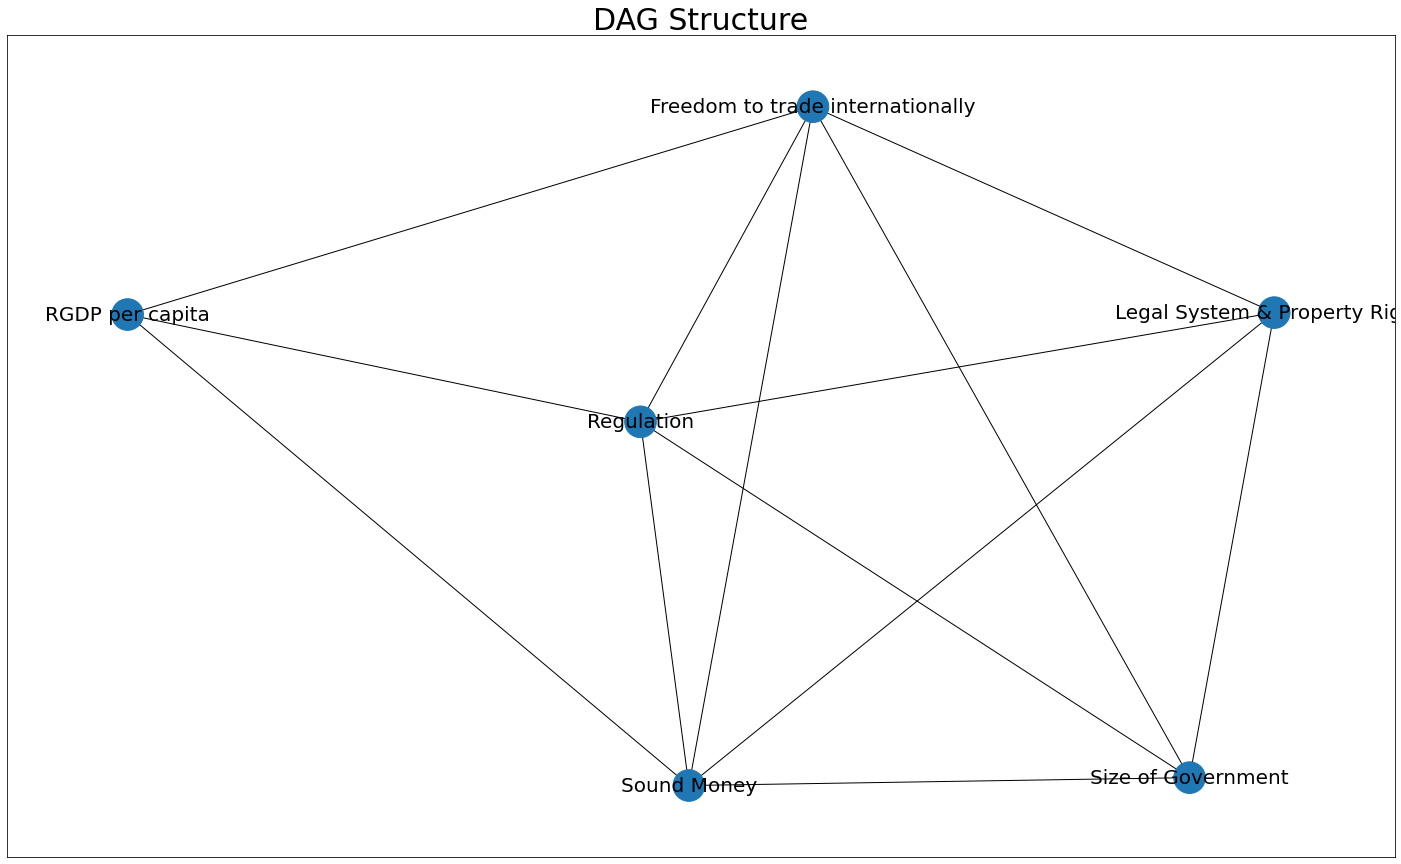

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
#                 edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, 
                     pos, 
                     node_color = color_map,
                     node_size=1000,
                    # show node label
                     with_labels = True,
                     arrows = False,
                     font_size = 20,
                     alpha = 1,
                     font_color = "k",
                     ax = ax)
#     nx.draw_networkx_edge_labels(graph,
#                                  pos,
#                                 edge_labels = edge_labels,
#                                  font_color = "green",
#                                  font_size=20)    
    
    plt.show()
    
graph_DAG(undirected_graph, economic_data)

In [ ]:
economic_data